In [1]:
# Add the root path of the pyqula library
import os ; import sys
try: sys.path.append(os.environ["PYQULAROOT"]) # add the library via environmental variable
except: 
    try: from pyqula import geometry # check if the library is present
    except: print("Install pyqula with\npip install --upgrade pyqula") # pyqula must be installed
    
# some default parameters in matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['image.cmap'] = 'coolwarm'

# parallelization
# from pyqula import parallel ; parallel.set_cores("max") # uncomment to use all the cores

import numpy as np

# Electronic structure of 2D materials
Here we will first compute the electronic structure of 2D materials, and in particular graphene

### Contents
- Electronic structure of 2D materials
- Electronic structure in nanoribbonds
- Impact of interactions and symmetry breaking in 2D materials
- Impact of impurities in 2D materials

### Learning outcomes
- Understand how to rationalize the electronic structure of infinite 2D systems
- Understand the impact of electronic interactions in 2D materials featuring zero modes
- Rationalize the impact of interactions in electronic systems
- Understand how impurities can create resonant modes

## Infinite two-dimensional graphene
First, we will consider a two-dimensional honeycomb lattice that is infinite in both directions

(-8.8, 8.8, -4.763139720814412, 4.763139720814412)

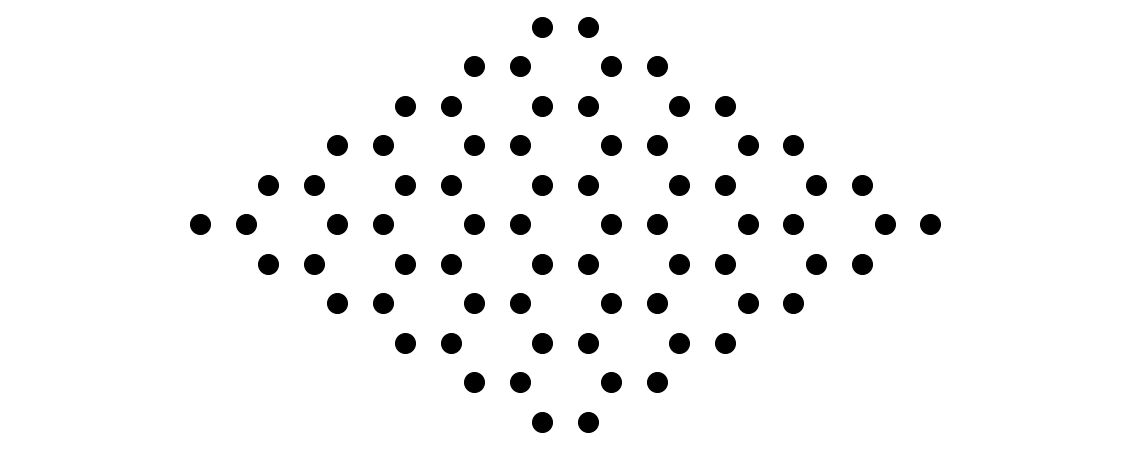

In [2]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a honeycomb lattice
gs = g.get_supercell((6,6)) # make a supercell and plot the structure
plt.scatter(gs.r[:,0],gs.r[:,1],c="black",s=400) ; plt.axis("equal") ; plt.axis("off") 

### Exercise
- Identify the unit cell in the plot above
- Replace the honeycomb lattice by a kagome lattice (kagome_lattice). Identify the unit cell

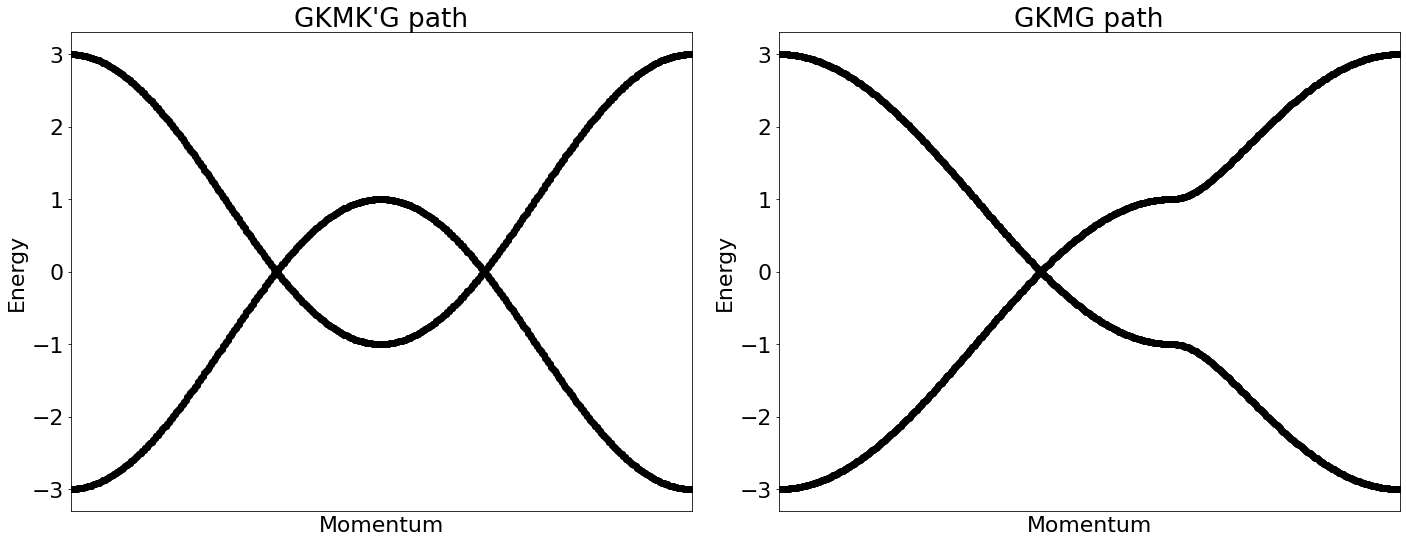

In [3]:
from pyqula import geometry
# now compute the band structure
plt.subplot(1,2,1) ; plt.title("GKMK'G path")
g = geometry.honeycomb_lattice() # generate a honeycomb lattice
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.xlim([min(k),max(k)])

# we can also compute the band structure in a different kpath
plt.subplot(1,2,2) ; plt.title("GKMG path")
g = geometry.honeycomb_lattice() # generate a honeycomb lattice
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands(kpath=["G","K","M","G"]) # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.xlim([min(k),max(k)])

plt.tight_layout()

### Exercise
- Identify the location of the Dirac point in the previous plots

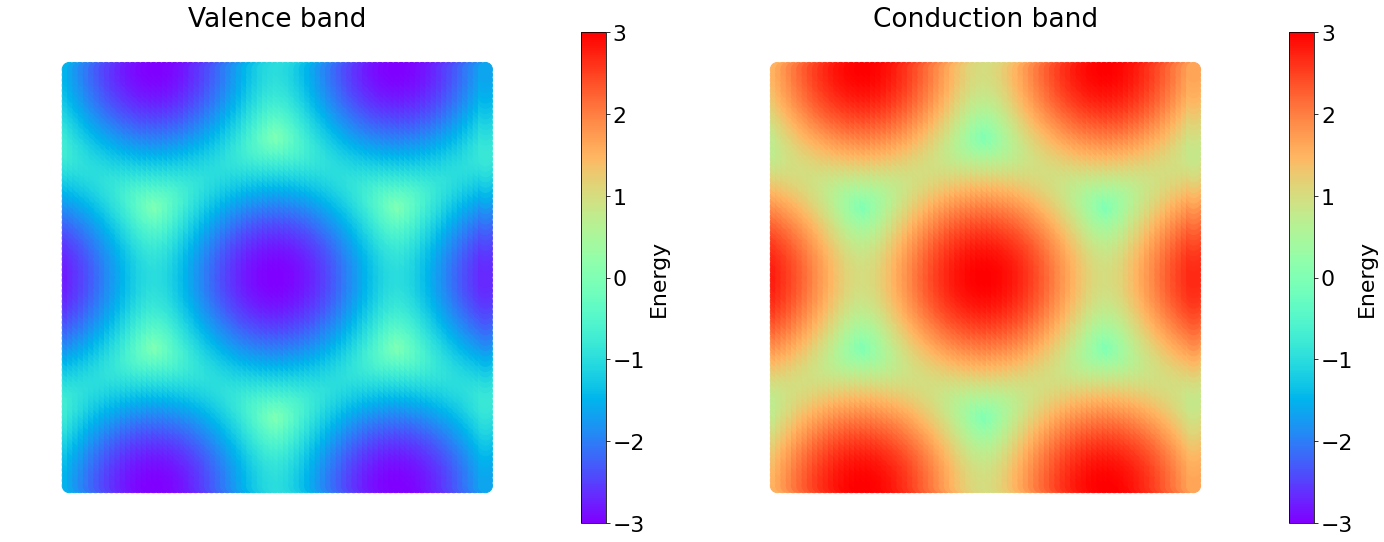

In [4]:
# we can also compute the band structure in the 2d Brillouin zone
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a honeycomb lattice
h = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian

def plot_case(k,e):
    plt.scatter(k[:,0],k[:,1],c=e,s=200,cmap="rainbow",vmin=-3,vmax=3) 
    plt.axis("off") ; plt.axis("equal") ; plt.colorbar(label="Energy")
    
# valence band state
(k,e) = h.get_bands_map(n=0,nk=80) 
plt.subplot(1,2,1) ; plt.title("Valence band")
plot_case(k,e)

# valence band state
(k,e) = h.get_bands_map(n=1,nk=80) 
plt.subplot(1,2,2) ; plt.title("Conduction band")
plot_case(k,e)

plt.tight_layout()

### Exercise
- Identify the location of the Dirac point in the 2D bandstructure above
- Replace the honeycomb lattice by a Kagome lattice. What do you see in those maps and what does it imply?

## Fermi surface
Let us now see how to compute Fermi surface, focusing on the case of 2D graphene

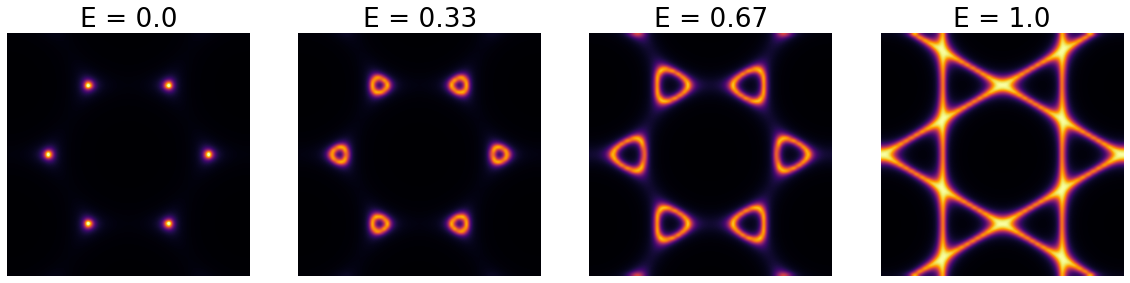

In [5]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a honeycomb lattice
h = g.get_hamiltonian() # generate the Hamiltonian
delta = 0.1 ; nk = 80 # smearing and kmesh
energies = np.linspace(0.,1.,4) # energies
ip = 1 # counter for the plot
for e in energies:
    (x,y,d) = h.get_fermi_surface(e=e,delta=delta,nk=nk) # compute Fermi surface
    plt.subplot(1,len(energies),ip) ; ip += 1 # set subplot
    d2d = d.reshape((nk,nk)) ; plt.imshow(d2d,vmin=0.,vmax=2./delta,cmap="inferno",interpolation="bicubic") 
    plt.title("E = "+str(np.round(e,2))) ; plt.axis("off")

### Exercise
- Identify at which energy the van Hove singularity appears
- Compute the Fermi surface at higher energies. How many pockets do you have after you pass the van Hove singularity?

## Density of states
Let us now see how to compute Fermi surface, focusing on the case of 2D graphene

(0.0, 1.3393887175848458)

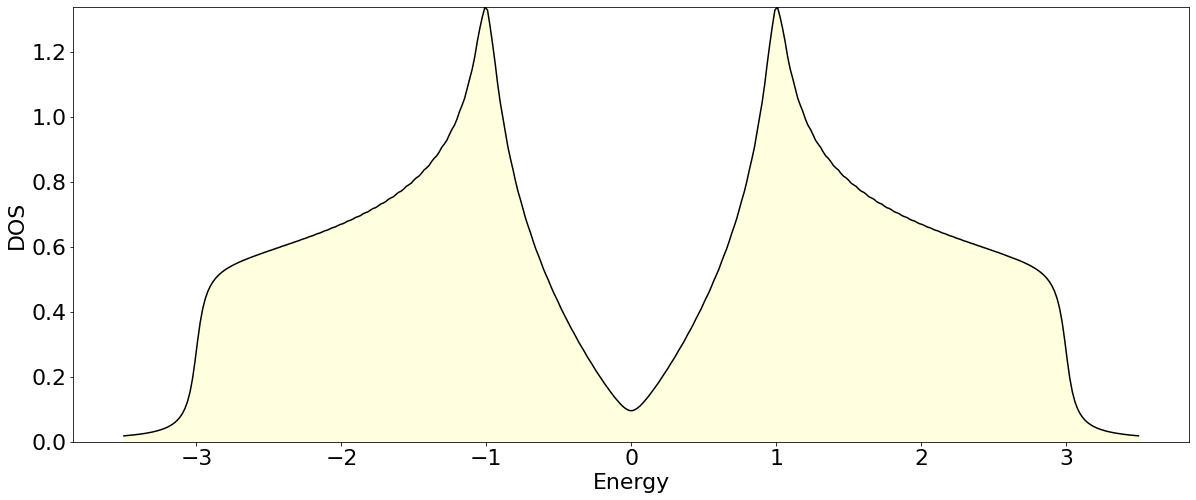

In [6]:
# we can also compute the total density of states
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a honeycomb lattice
h = g.get_hamiltonian() # generate the Hamiltonian
(e,d) = h.get_dos(delta=5e-2,energies=np.linspace(-3.5,3.5,400)) # let us compute now the density of states
plt.plot(e,d,c="black") ; plt.xlabel("Energy") ; plt.ylabel("DOS") # plot
plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background
plt.ylim([0,max(d)])

### Exercise
- Identify the location of the Dirac point in the density of states
- Identify the location of the van Hove singularity in the density of states
- Replace the honeycomb lattice by a triangular lattice. DO you still observe a Dirac point and van Hove singularities?

## Electron-hole asymmetry in graphene
Let us now look at how the electronic structure of graphene changes when we introduce second neighbor hopping, which gives rise to electron hole asymmetry

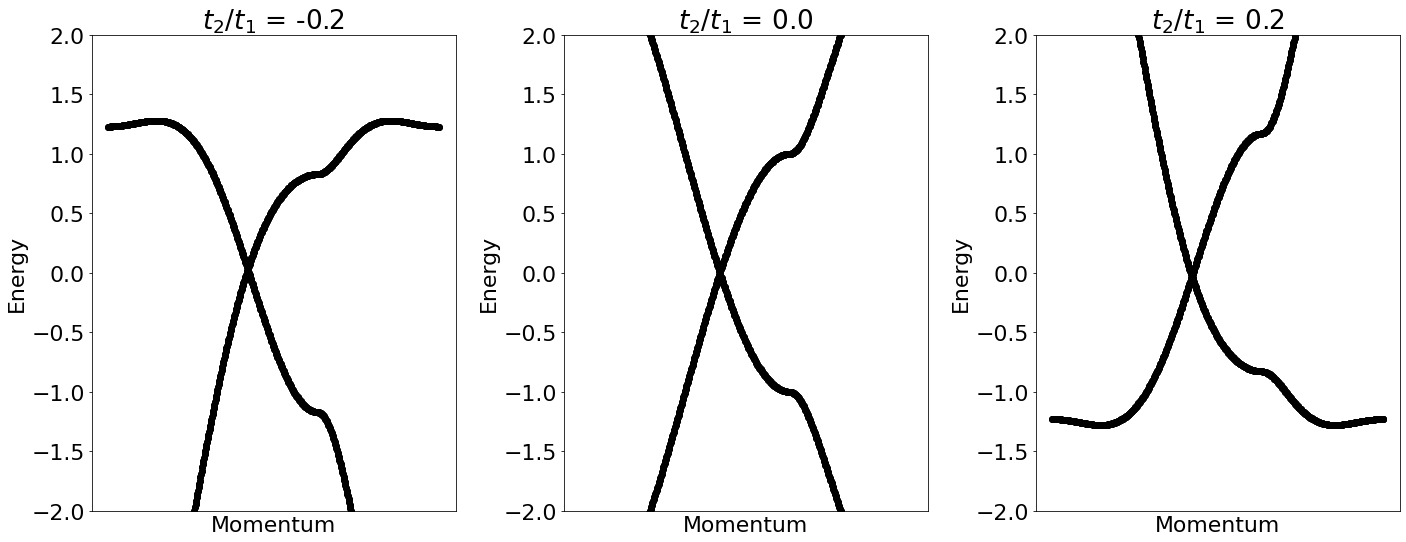

In [7]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a honeycomb lattice
t2s = np.linspace(-.2,.2,3) # electron-hole aysmmetry
ip = 1 # counter for the plot
for t2 in t2s: # loop over second neighbor hopping strength
    plt.subplot(1,len(t2s),ip) ; ip += 1 # set subplot
    h = g.get_hamiltonian(tij=[1.,t2]) ; h.set_filling(0.5) # generate the Hamiltonian
    (k,e) = h.get_bands(kpath=["G","K","M","G"]) # compute band structure
    plt.title("$t_2/t_1$ = "+str(np.round(t2,2)))
    plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim(-2.,2.)
plt.tight_layout()

### Exercise
- Identify the location of the Dirac point in the cases above
- Replace the second neighbor hopping by a third neighbor hopping (tij=[1.,0.,t3]). Do you observe electron-hole asymmetry?
- Add 2nd and 3rd neighbor hopping. Do you observe the Dirac point in all the cases? Discuss why

## Graphene nanoribbons
We now focus on considering nanoribbons, systems with a finite width and infinite in the x-direction

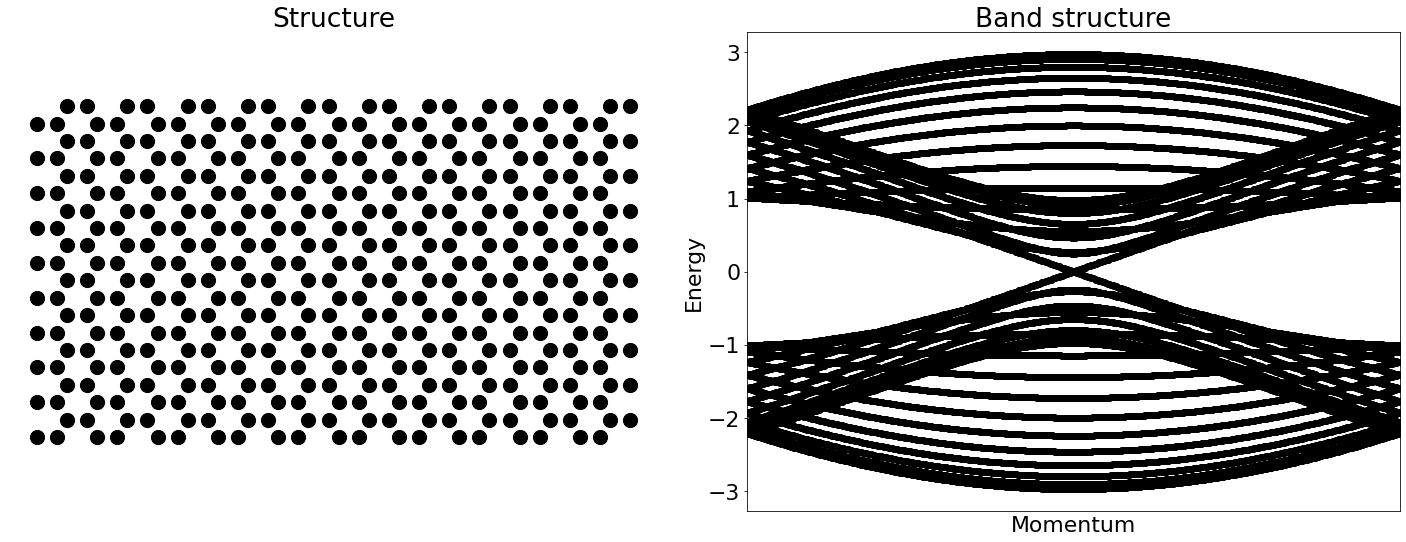

In [8]:
from pyqula import geometry
 
plt.subplot(1,2,1) ; plt.title("Structure")
g = geometry.honeycomb_armchair_ribbon(10) # generate a honeycomb lattice
gs = g.get_supercell(10) # make a supercell and plot the structure
plt.scatter(gs.r[:,0],gs.r[:,1],c="black",s=200) ; plt.axis("equal") ; plt.axis("off") 

plt.subplot(1,2,2) ; plt.title("Band structure")
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands(kpath=["M","G","M"]) # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.xlim([min(k),max(k)])

plt.tight_layout()

### Exercise
- Discuss why there are now more bands than in the bulk calculations
- Change the width of the ribbon. What happens to the number of bands in the plot above, and why?

Now we will compute the density of states of graphene nanoribbon, and see that it resembles the one of two dimensional graphene

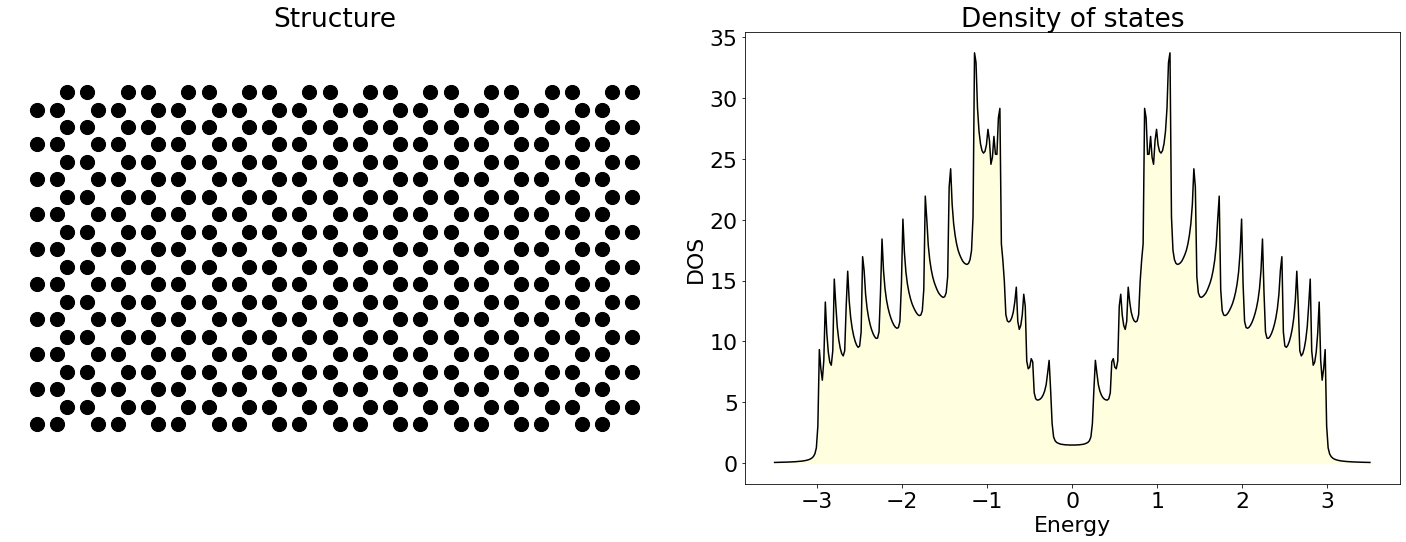

In [9]:
from pyqula import geometry
 
plt.subplot(1,2,1) ; plt.title("Structure")
g = geometry.honeycomb_armchair_ribbon(10) # generate a honeycomb lattice
gs = g.get_supercell(10) # make a supercell and plot the structure
plt.scatter(gs.r[:,0],gs.r[:,1],c="black",s=200) ; plt.axis("equal") ; plt.axis("off") 

plt.subplot(1,2,2) ; plt.title("Density of states")
h = g.get_hamiltonian() # generate the Hamiltonian
(e,d) = h.get_dos(delta=1e-2,energies=np.linspace(-3.5,3.5,400),nk=300) # let us compute now the density of states
plt.plot(e,d,c="black") ; plt.xlabel("Energy") ; plt.ylabel("DOS") # plot
plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background

plt.tight_layout()

### Exercise
- Why are there several divergencies on the DOS?
- Change the width of the ribbon. How does the number of peaks change?

## Width dependence of the electronic structure in graphene nanoribbons
Let us now address how the electronic structure of graphene depends on the width of the nanoribbon

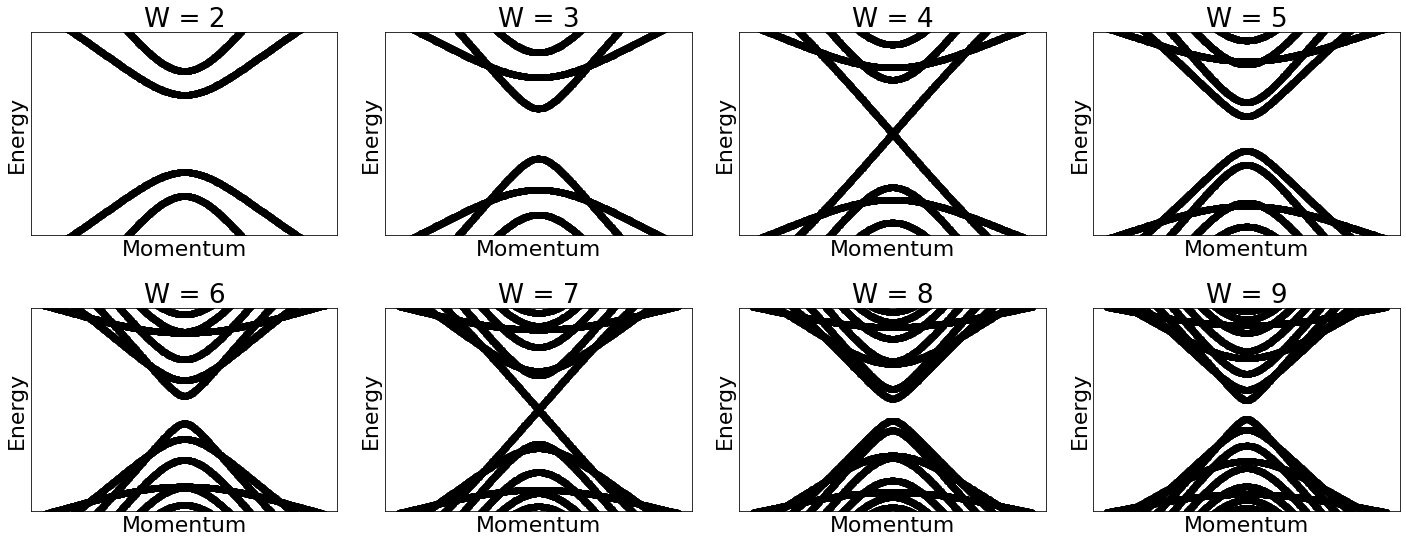

In [10]:
from pyqula import geometry
# plot the bands for different widths
ns = range(2,10,1) # widths
ij = 0 # counter
for n in ns: # loop over widths
    g = geometry.honeycomb_armchair_ribbon(n) # generate ribbon
    h = g.get_hamiltonian() # get the Hamiltonian
    (k,e) = h.get_bands(kpath=["M","G","M"]) # compute the bands
    plt.subplot(len(ns)//4,4,ij+1) ; ij +=1 
    plt.scatter(k,e,c="black") ;  plt.ylim([-1,1]) ; plt.title("W = "+str(n)) # plot
    plt.xticks([]) ; plt.yticks([]) ; plt.xlabel("Momentum") ; plt.ylabel("Energy")
plt.tight_layout()

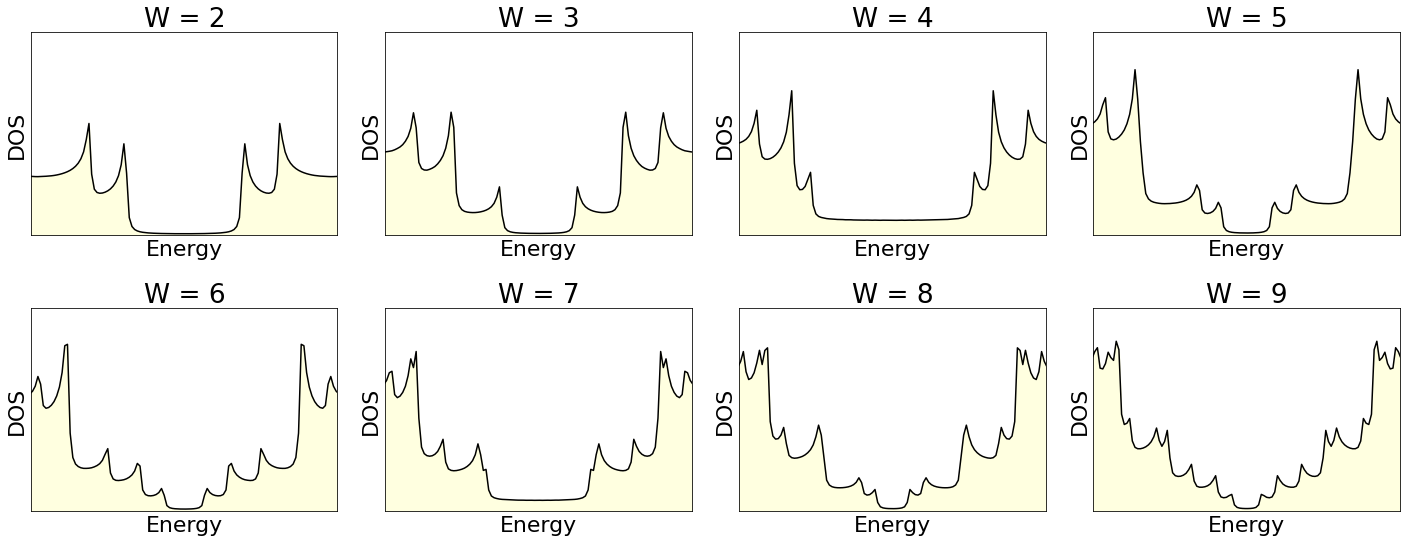

In [11]:
from pyqula import geometry
# plot the DOS for different widths
ns = range(2,10,1) # widths
ij = 0 # counter
for n in ns: # loop over widths
    g = geometry.honeycomb_armchair_ribbon(n) # generate ribbon
    h = g.get_hamiltonian() # get the Hamiltonian
    (e,d) = h.get_dos(delta=1e-2,energies=np.linspace(-3.5,3.5,400),nk=300) # DOS
    plt.subplot(len(ns)//4,4,ij+1) ; ij +=1 
    plt.plot(e,d,c="black") ;  plt.xlim([-1,1]) ; plt.ylim([0,max(d)]) ; plt.title("W = "+str(n)) 
    plt.xticks([]) ; plt.yticks([]) ; plt.xlabel("Energy") ; plt.ylabel("DOS")
    plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background
plt.tight_layout()

### Exercise
- Some the nanoribbons are gapless whereas others are gapped. Can you infer which ones are gapless?
- The gap in the gapped nanorribons decreases with the width. Can you infer what is the functional form of the gap as a function of the width, and why?

#### In the lab
- Perfect graphene armchair nanoribbons can be synthetized with on surface synthesis as shown in
https://pubs.acs.org/doi/full/10.1021/acsnano.6b06405

## Graphene nanoislands
Here we will consider graphene nanoislands containing a finite number of atoms

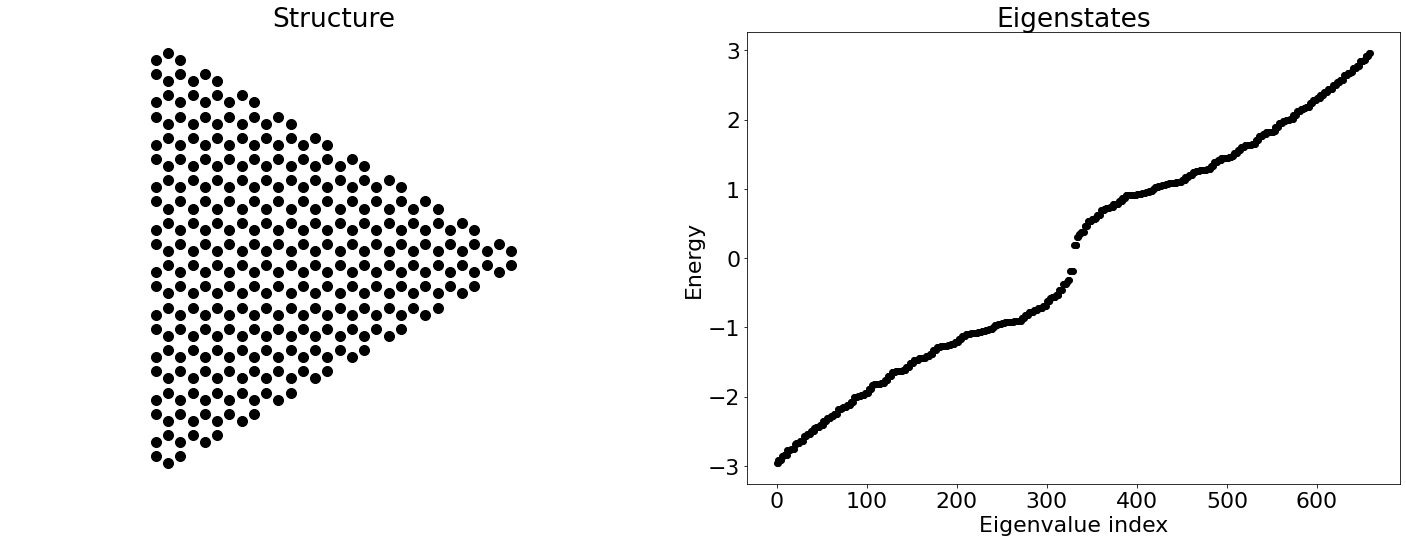

In [12]:
from pyqula import islands # import the islands library

plt.subplot(1,2,1) ; plt.title("Structure")
g = islands.get_geometry(name="honeycomb",nedges=3,n=6,rot=np.pi/6.) # honeycomb quantum dot
h = g.get_hamiltonian() # get the Hamiltonian
plt.scatter(g.r[:,0],g.r[:,1],c="black",s=100) ; plt.axis("equal") ; plt.axis("off") 

# now plot the eigenstates
plt.subplot(1,2,2) ; plt.title("Eigenstates")
(inds,es) = h.get_bands() # get the eigenenergies
plt.scatter(range(len(es)),es,c="black") ; plt.xlabel("Eigenvalue index") ; plt.ylabel("Energy") 

plt.tight_layout()

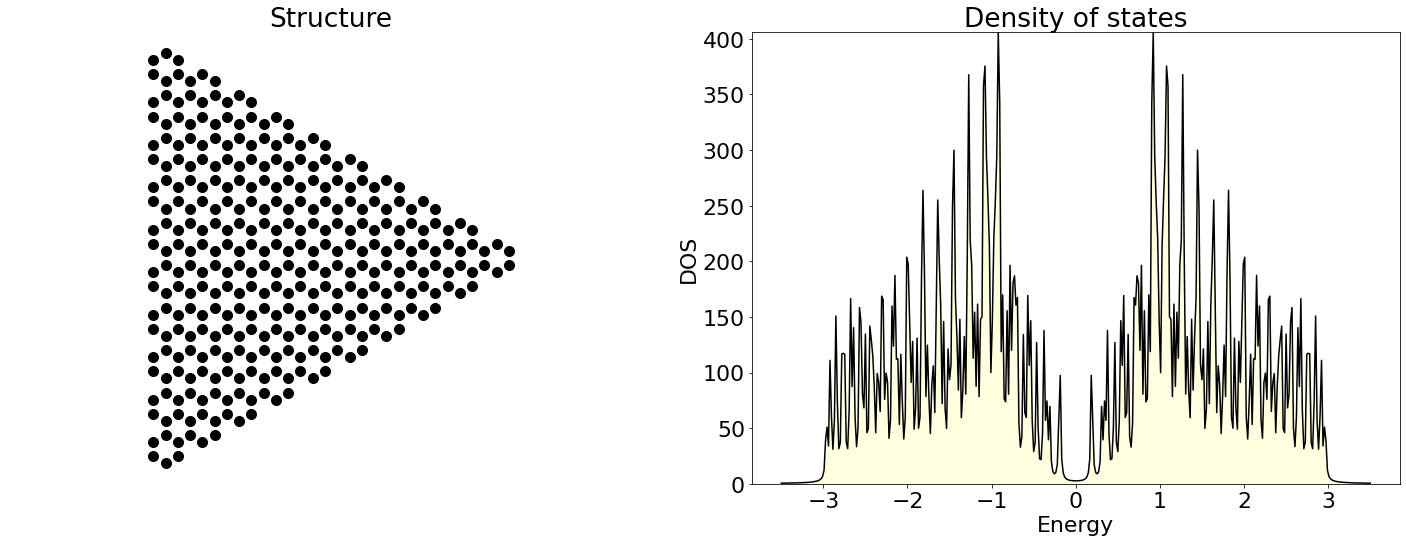

In [13]:
from pyqula import islands # import the islands library

n = 6 # this controls the size of the nanoisland

plt.subplot(1,2,1) ; plt.title("Structure")
g = islands.get_geometry(name="honeycomb",nedges=3,n=n,rot=np.pi/6.) # honeycomb quantum dot
h = g.get_hamiltonian() # get the Hamiltonian
plt.scatter(g.r[:,0],g.r[:,1],c="black",s=100) ; plt.axis("equal") ; plt.axis("off") 

# now plot the eigenstates
plt.subplot(1,2,2) ; plt.title("Density of states")
# now compute the density of states
(e,d) = h.get_dos(delta=1e-2,energies=np.linspace(-3.5,3.5,400)) # let us compute now the density of states
plt.plot(e,d,c="black") ; plt.xlabel("Energy") ; plt.ylabel("DOS") ; plt.ylim([0,max(d)])
plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background

plt.tight_layout()

### Exercise
- Change the size of the island. How does the DOS change and why?

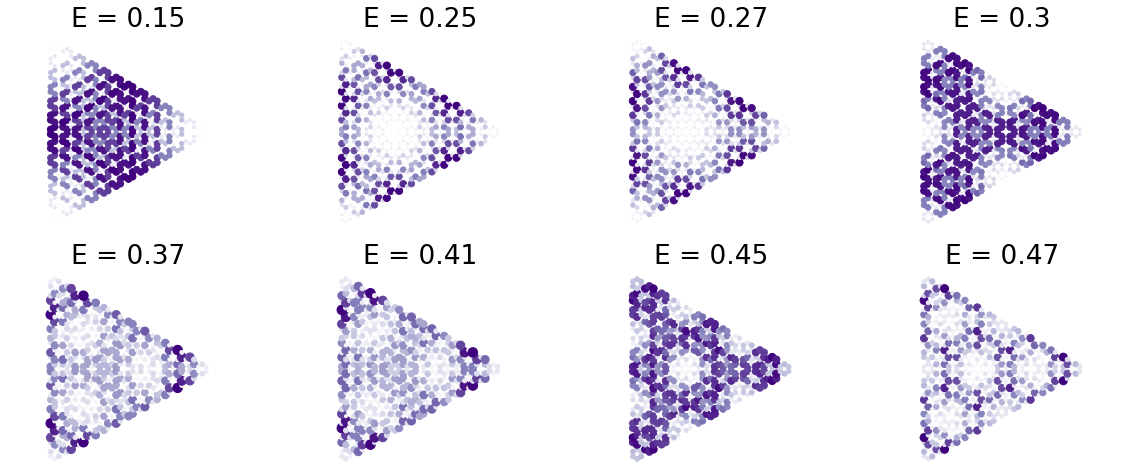

In [14]:
from pyqula import islands # import the islands library
nedges = 3 # this controls how many edges the island has
g = islands.get_geometry(name="honeycomb",nedges=nedges,n=8,rot=np.pi/6.) # honeycomb quantum dot
h = g.get_hamiltonian() # get the Hamiltonian

# now compute the LDOS at the valence states closest to zero
ne = 8 # number of energies to consider
(inds,es) = h.get_bands() # get the eigenenergies
es = np.unique(np.round(es,5)) # unique energies
esp = es[es>=0][0:ne] # positive energies
ie = 0 # start counter
for e in esp:
    x,y,d = h.get_ldos(e=e,delta=1e-2) # get the LDOS
    plt.subplot(ne//4,4,ie+1) ; ie +=1  # create a subplot
    plt.scatter(x,y,c=d,s=np.array(d)*100,cmap="Purples") ; plt.axis("off") 
    plt.axis("equal") ; plt.title("E = "+str(np.round(e,2)))


### Exercise
- Create a hexagonal quantum dot instead of a triangular one, and show how the confined modes look like

# Interactions
Here we will show how electronic interactions can impact a electronic structure, by addressing some interacting models at the mean-field level

## Phase transition with electronic interactions
We will first address the impact of electronic repulsion in the honeycomb lattice, showing how at a critical value an interaction induced gap emerges

([], [])

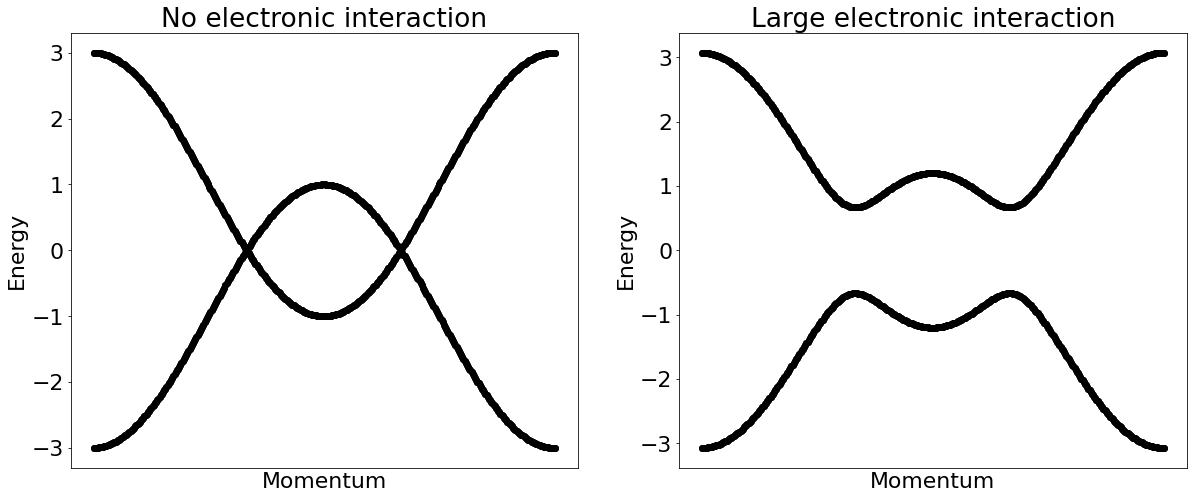

In [15]:
# first plot the mean-field Hamiltonian with no interactions
from pyqula import geometry
g = geometry.honeycomb_lattice() # create a honeycomb lattice
h = g.get_hamiltonian() # generate a Hamiltonian

plt.subplot(1,2,1) ;  plt.title("No electronic interaction")
hscf = h.get_mean_field_hamiltonian(U=0.0,filling=0.5,mf="random",mix=0.9) # solve mean-field Hamiltonian
(k,e) = hscf.get_bands() # get bandstructure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# now include a finite interaction U=3
plt.subplot(1,2,2) ;  plt.title("Large electronic interaction")
hscf = h.get_mean_field_hamiltonian(U=3.0,filling=0.5,mf="random",mix=0.9) # solve mean-field Hamiltonian
(k,e) = hscf.get_bands() # get bandstructure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

### Exercise
- Decrease the value of teh onsite interaction U below 2. What happens and why?

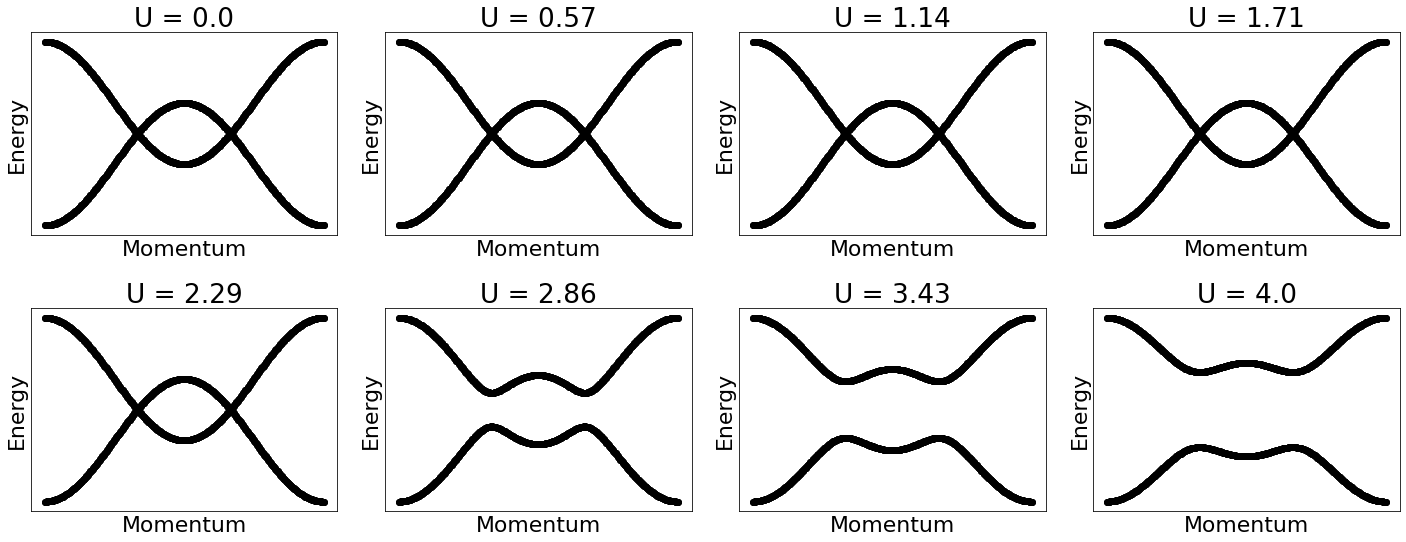

In [16]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # create a honeycomb lattice
# We will solve a Hubbard model at the mean-field level
Us = np.linspace(0.,4.0,8) # Hubbard Us considered
iu = 0 # start counter
for U in Us:
    h = g.get_hamiltonian() # generate a Hamiltonian
    hscf = h.get_mean_field_hamiltonian(U=U, filling=0.5,mf="random",mix=0.9) # solve mean-field Hamiltonian
    (k,e) = hscf.get_bands() # get bandstructure
    plt.subplot(len(Us)//4,4,iu+1) ; iu +=1  # create a subplot
    plt.scatter(k,e,c="black") ;  plt.title("U = "+str(round(U,2)))
    plt.xticks([]) ; plt.yticks([]) ; plt.xlabel("Momentum") ; plt.ylabel("Energy")
plt.tight_layout()

### Exercise
- Find the critical value of U that gives rise to the gap opening
- What is the symmetry breaking that gives rise to such a gap opening?

## Interaction induced symmetry breaking in quantum dots
Here we will show how in the presence of zero modes, a symmetry breaking can appear for arbitrarily small itneraction strength

Text(0, 0.5, 'Energy')

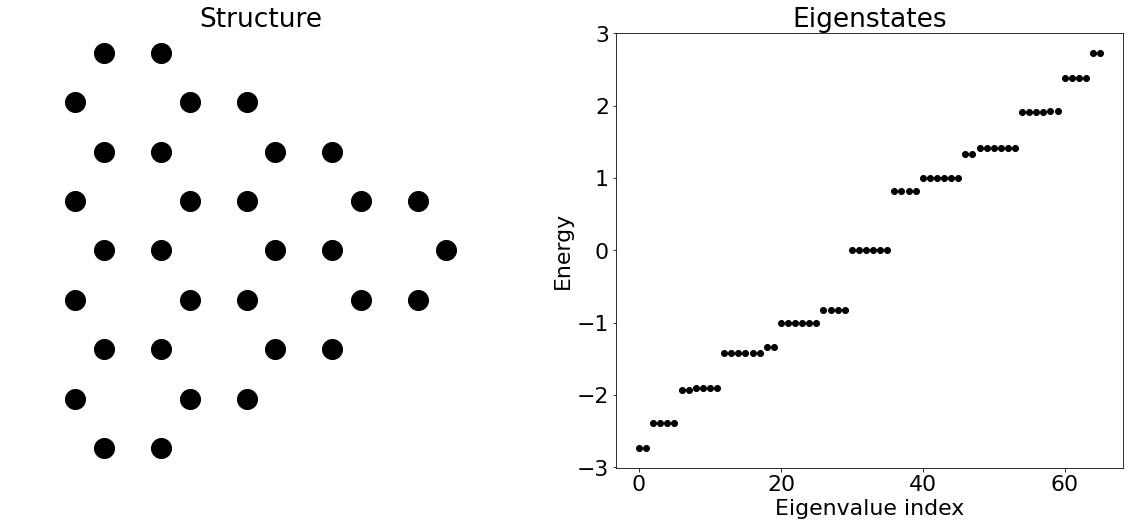

In [17]:
from pyqula import islands
n  = 2 # this integer controls the size of the island
g = islands.get_geometry(name="honeycomb",nedges=3,n=n,rot=0.) # honeycomb quantum dot
h = g.get_hamiltonian() # get the Hamiltonian

plt.subplot(1,2,1) ; plt.title("Structure")
plt.scatter(g.r[:,0],g.r[:,1],c="black",s=400) ; plt.axis("equal") ; plt.axis("off") 

# now plot the eigenstates
plt.subplot(1,2,2) ; plt.title("Eigenstates")
(inds,es) = h.get_bands() # get the eigenenergies
plt.scatter(range(len(es)),es,c="black") ; plt.xlabel("Eigenvalue index") ; plt.ylabel("Energy") # plot
# note that there are now several zero modes!

### Exercise
- Change the size of the island, and show that zero modes also appear in bigger islands

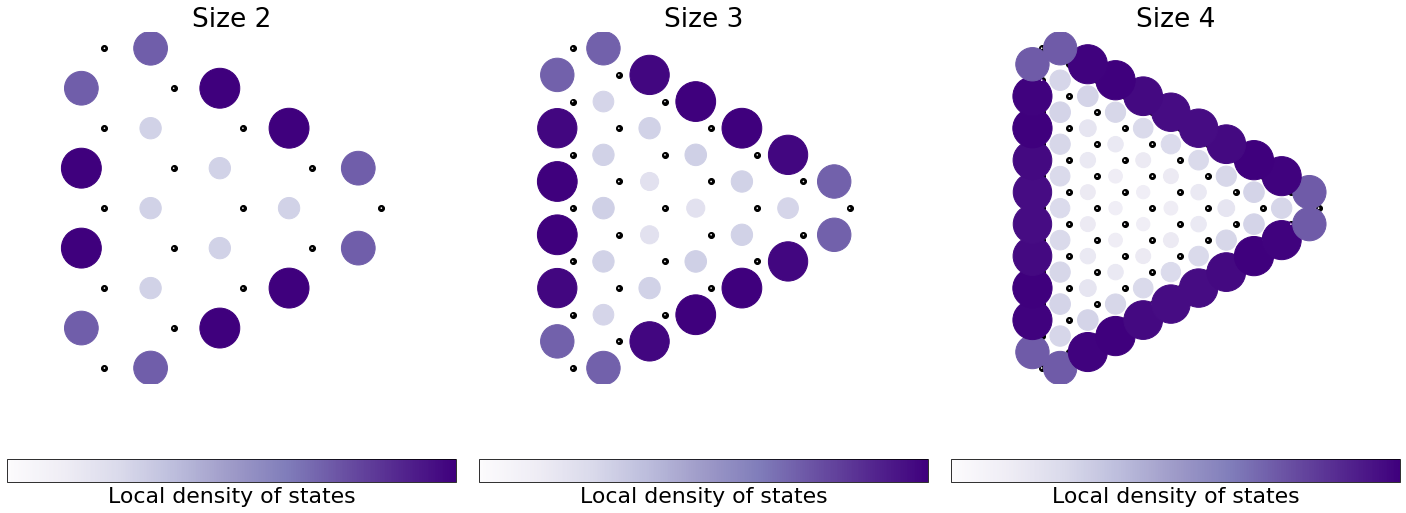

In [18]:
from pyqula import islands

ns = [2,3,4] # different sizes
ii = 1
for n in ns:
    plt.subplot(1,len(ns),ii) ; plt.title("Size "+str(n))
    g = islands.get_geometry(name="honeycomb",nedges=3,n=n,rot=0.) # honeycomb quantum dot
    h = g.get_hamiltonian() # get the Hamiltonian
    # now compute the LDOS at zero energy 
    x,y,d = h.get_ldos(e=0.0,delta=1e-2) # get the LDOS
    plt.scatter(x,y,c="black") # plot lattice as a reference
    plt.scatter(x,y,c=d,s=np.array(d)*100,cmap="Purples") ; plt.axis("off") ; plt.axis("equal") 
    # see that the zero modes are located at the edge
    plt.colorbar(label="Local density of states",ticks=[],orientation="horizontal")
    ii += 1 # increase counter
plt.tight_layout()

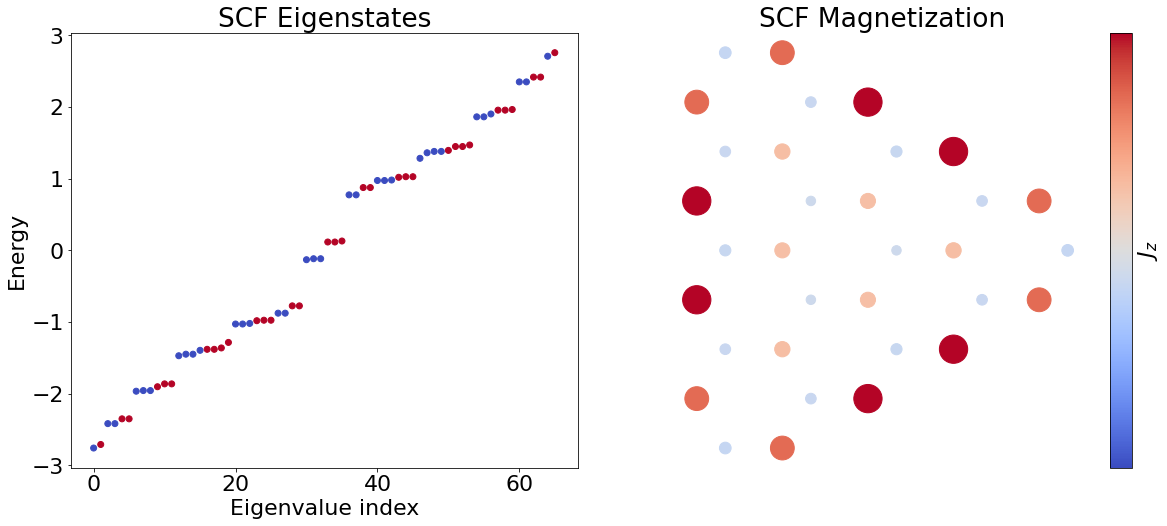

In [19]:
# now let us add interactions
from pyqula import islands
g = islands.get_geometry(name="honeycomb",nedges=3,n=2,rot=0.) # honeycomb quantum dot
h = g.get_hamiltonian() # get the Hamiltonian
hscf = h.get_mean_field_hamiltonian(U=1.0, filling=0.5,mf="ferro",mix=0.9) # solve mean-field Hamiltonian
(inds,es,sz) = hscf.get_bands(operator="sz") # get the eigenenergies
plt.subplot(1,2,1) ; plt.title("SCF Eigenstates")
plt.scatter(range(len(es)),es,c=sz) ; plt.xlabel("Eigenvalue index") ; plt.ylabel("Energy") # plot
# note that there is now a splitting between the zero modes

# now compute the LDOS at zero energy 
plt.subplot(1,2,2) ; plt.title("SCF Magnetization")
mz = hscf.get_magnetization()[:,2] # get the LDOS
mzn = mz/np.max(np.abs(mz)) # normalized
plt.scatter(g.r[:,0],g.r[:,1],c="black") # sites as reference
plt.scatter(g.r[:,0],g.r[:,1],c=mz,s=800*np.abs(mzn),vmin=-np.max(np.abs(mz)),vmax=np.max(np.abs(mz))) 
plt.axis("off") ; plt.axis("equal") ; plt.colorbar(label="$J_z$",ticks=[]) 
# show the self-consistent magnetization

### Exercise
- Create a bigger island with zigzag edges, and show that it still hosts zero modes
- Show that when including interactions, magnetization emerges at the edges in those bigger islands

## Interaction induced symmetry breaking in nanoribbons
We will now show that magnetic order can also appear at the edges of a graphene nanoribbon for a zigzag interface

(0.0, 399.0)

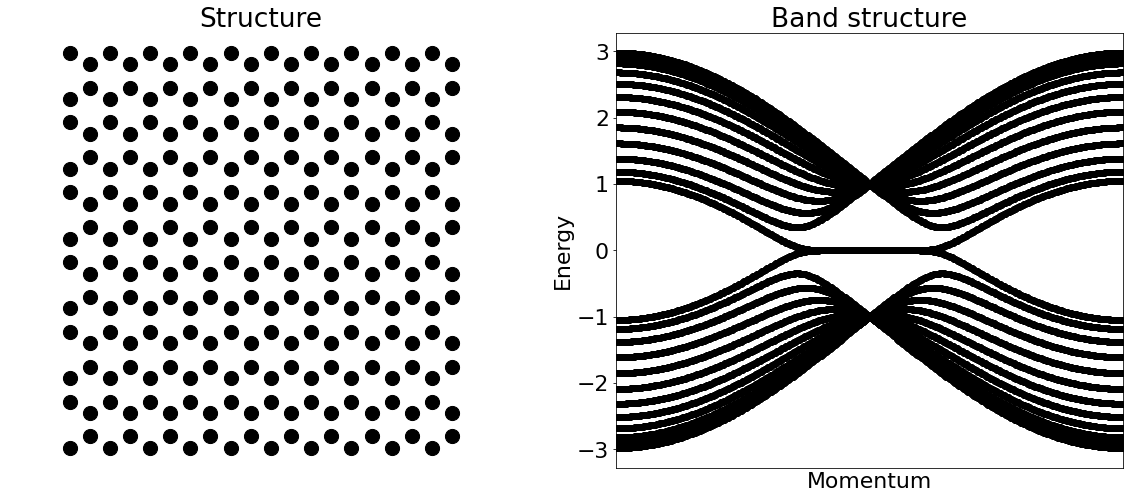

In [20]:
# create a zigzag nanoribbon
from pyqula import geometry
g = geometry.honeycomb_zigzag_ribbon(6) # generate a zigzag nanoribbon
gs = g.get_supercell(10) # make a supercell and plot the structure

plt.subplot(1,2,1) ; plt.title("Structure")
plt.scatter(gs.r[:,0],gs.r[:,1],c="black",s=200) ; plt.axis("equal") ; plt.axis("off") 

# now compute the band structure
plt.subplot(1,2,2) ; plt.title("Band structure")
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.xlim([min(k),max(k)])

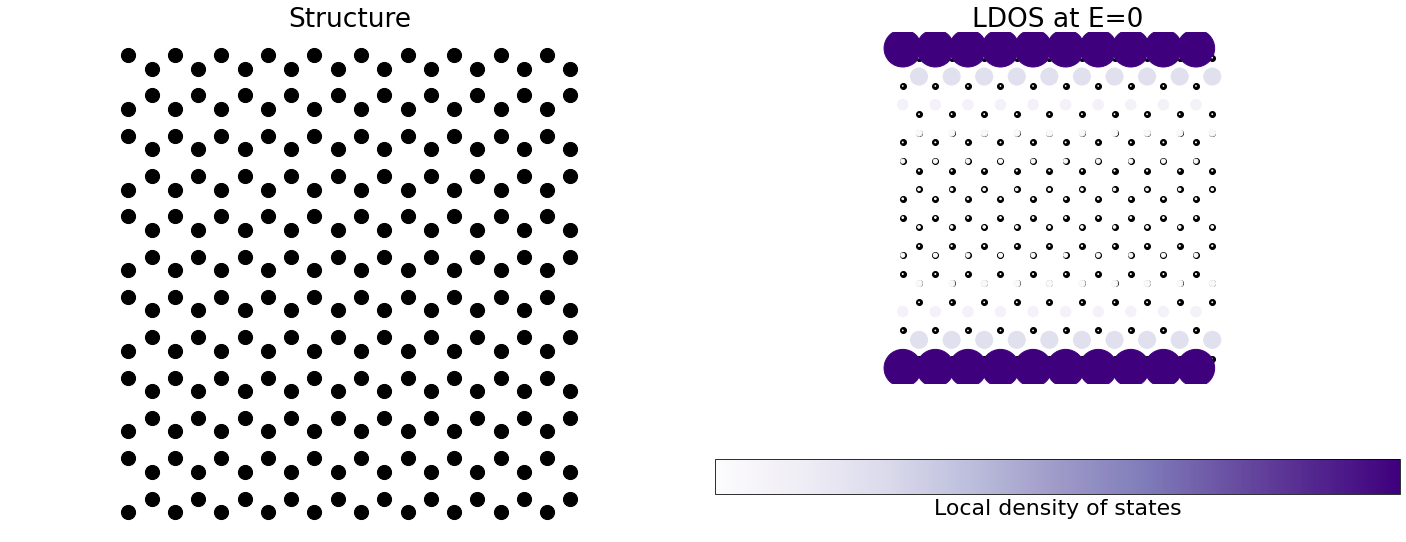

In [21]:
# create a zigzag nanoribbon
from pyqula import geometry
g = geometry.honeycomb_zigzag_ribbon(6) # generate a zigzag nanoribbon
gs = g.get_supercell(10) # make a supercell and plot the structure

plt.subplot(1,2,1) ; plt.title("Structure")
plt.scatter(gs.r[:,0],gs.r[:,1],c="black",s=200) ; plt.axis("equal") ; plt.axis("off") 


plt.subplot(1,2,2) ; plt.title("LDOS at E=0")
# now compute the LDOS at zero energy 
x,y,d = h.get_ldos(e=0.0,delta=1e-2,nrep=10) # get the LDOS
plt.scatter(x,y,c="black") # plot lattice as a reference
plt.scatter(x,y,c=d,s=np.array(d)*100,cmap="Purples") ; plt.axis("off") ; plt.axis("equal") # plot LDOS
# see that the zero modes are located at the edge
plt.colorbar(label="Local density of states",ticks=[],orientation="horizontal")
plt.tight_layout()

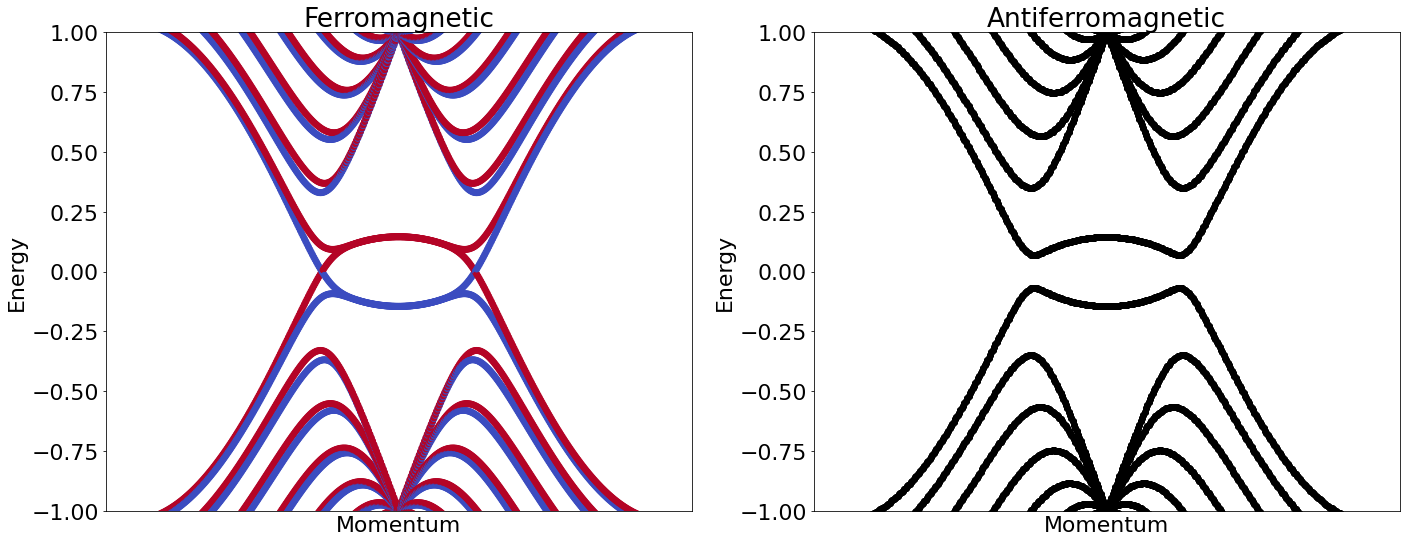

In [22]:
from pyqula import geometry
g = geometry.honeycomb_zigzag_ribbon(6) # generate a zigzag nanoribbon
h = g.get_hamiltonian() # generate the Hamiltonian

# now let us add interactions
# first with ferromagnetic initialization
plt.subplot(1,2,1)
hscf = h.get_mean_field_hamiltonian(U=1.0, filling=0.5,mf="ferro",mix=0.9) # solve mean-field Hamiltonian
(k,e,sz) = hscf.get_bands(operator="sz") # get the eigenenergies
plt.scatter(k,e,c=sz) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.ylim([-1.,1.]) ; plt.xticks([])
plt.title("Ferromagnetic")

# and later with antiferrromagnetic initialization
plt.subplot(1,2,2)
hscf = h.get_mean_field_hamiltonian(U=1.0, filling=0.5,mf="antiferro",mix=0.9) # solve mean-field Hamiltonian
(k,e) = hscf.get_bands() # get the eigenenergies
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.ylim([-1.,1.]) ; plt.xticks([]) 
plt.title("Antiferromagnetic")
# note that there is now a splitting between the zero modes

plt.tight_layout()

### Exercise
- We obtained two selfconsistent solutions,one FE and one AF, which one do you think that it is the ground state and why?

#### In the lab
- Zigzag graphene nanoribbons featuring edge states can be synthetized using on-surface synthesis, showing the correlated states notes above
https://www.nature.com/articles/nature17151

## Impurities in graphene
Let us now look at the effect of vacancies in graphene. An impurity can be modeled as an infinite potential

(0.0, 1.4297156446613277)

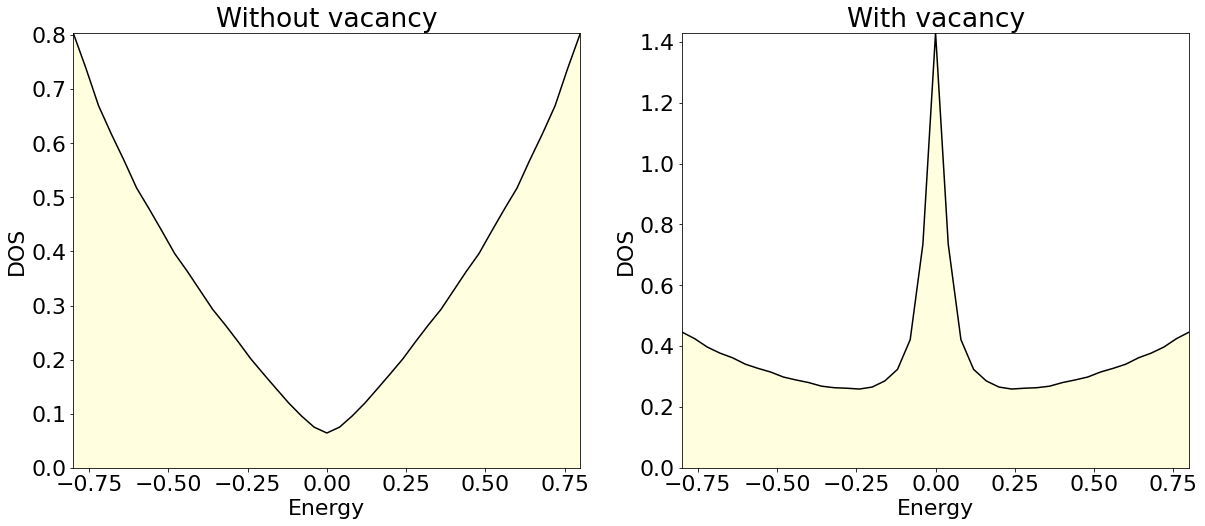

In [23]:
from pyqula import geometry, embedding, potentials
g = geometry.honeycomb_lattice() # take a triangular lattice
h = g.get_hamiltonian() # generate Hamiltonian

hv = h.copy() # make a copy
hv.add_onsite(potentials.impurity(g.r[0],v=1e6)) # unit cell with a vacancy

# first the pristine
plt.subplot(1,2,1) ; plt.title("Without vacancy")
eb = embedding.Embedding(h,m=h) 
energies = np.linspace(-.8,.8,41) # energy grid
(e,d) = eb.multidos(energies=energies,delta=3e-2) # compute LDOS
plt.plot(e,d,c="black") ; plt.xlabel("Energy") ; plt.ylabel("DOS") # plot
plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background
plt.xlim([min(e),max(e)]) ; plt.ylim([0.,max(d)])

# create an embedding object (infinite pristine system with h, central impurity hv)
plt.subplot(1,2,2) ; plt.title("With vacancy")
eb = embedding.Embedding(h,m=hv) 
(e,d) = eb.multidos(energies=energies,delta=3e-2) # compute LDOS
plt.plot(e,d,c="black") ; plt.xlabel("Energy") ; plt.ylabel("DOS") # plot
plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background
plt.xlim([min(e),max(e)]) ; plt.ylim([0.,max(d)])

### Exercise
- Replace the vacancy by just a large fintie potential (10 for example). How does the DOS of the impurity case change?
- In the case above, what happens if you change the sign of the local potential?

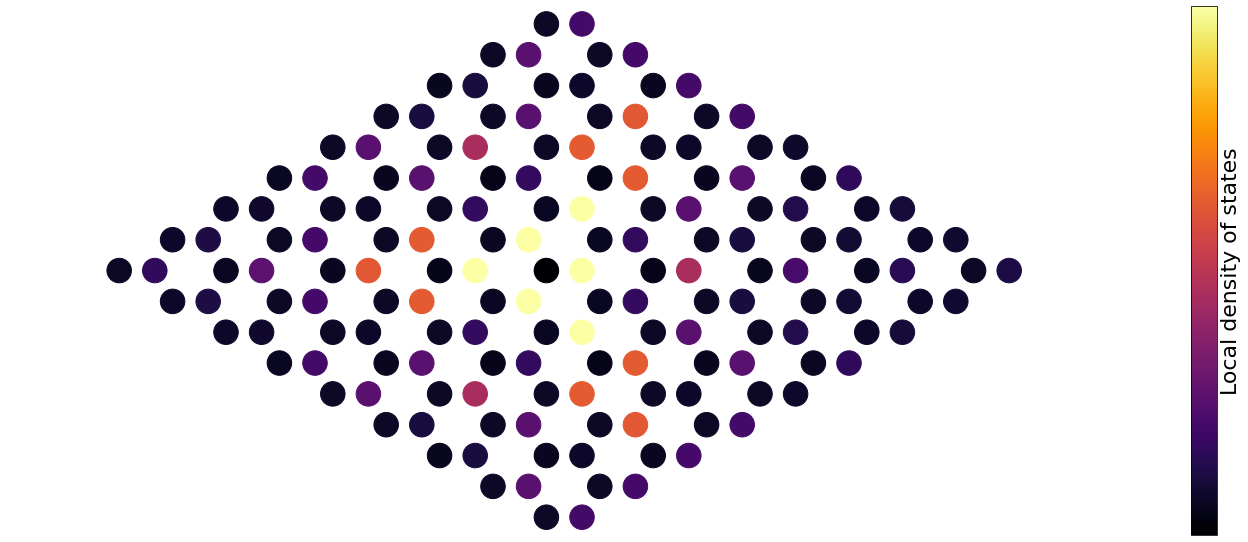

In [24]:
from pyqula import geometry, embedding, potentials
g = geometry.honeycomb_lattice() # take a honeycomb lattice
h = g.get_hamiltonian() # generate Hamiltonian
hv = h.copy() # make a copy
hv.add_onsite(potentials.impurity(g.r[0],v=1e6)) # unit cell with a vacancy
eb = embedding.Embedding(h,m=hv) # create the embedding object
(x,y,d) = eb.get_ldos(nsuper=9,energy=0.,delta=3e-2) # compute LDOS
d = d/np.max(d) # normalize
plt.scatter(x,y,c=d,s=600,vmin=0.,vmax=0.3,cmap="inferno") ; plt.axis("off") ; plt.axis("equal")
plt.colorbar(label="Local density of states",ticks=[])
plt.tight_layout()

### Exercise
- Change the energy for the LDOS. How does the profile change, and how do you interpret it?
- Replace the infinite potential by a finite potential (10 for example). How does the profile change?

#### In the lab
- Zero modes created by creating hydrogen atoms in graphene can be controllably engineered with STM
https://www.science.org/doi/full/10.1126/science.aad8038

## Impurities in a graphene superlattice
Let us now see how flat bands appear in a graphene supercell when impurities are included

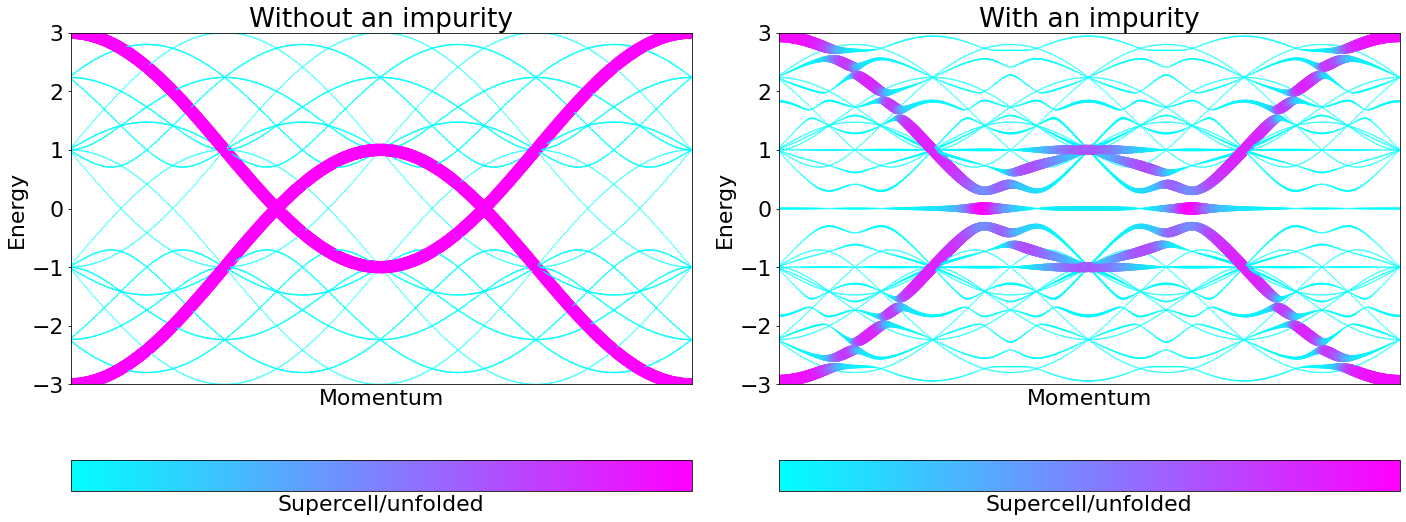

In [25]:
from pyqula import geometry, potentials
g = geometry.honeycomb_lattice() # take a triangular lattice
N = 4 # size of the supercell
g = g.get_supercell((N,N),store_primal=True) # generate a supercell
h = g.get_hamiltonian() # generate Hamiltonian

kpath = g.get_kpath()*N # compute in the original Brillouin zone, just by extending the reciprocal vectors

def plot_case(h):
    (k,e,c) = h.get_bands(operator="unfold",kpath=kpath) # compute band structure (unfolding to the original cell)
    plt.scatter(k,e,c=c,s=c*8+.1,cmap="cool") ; plt.xlabel("Momentum") 
    plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-3.,3.])# plot
    plt.colorbar(label="Supercell/unfolded",ticks=[],orientation="horizontal")
    plt.xlim([min(k),max(k)])

# first without impurity
plt.subplot(1,2,1) ; plt.title("Without an impurity")
plot_case(h)


# now with an impurity
h.add_onsite(potentials.impurity(g.r[0],v=1e6)) # cell with a vacancy
plt.subplot(1,2,2) ; plt.title("With an impurity")
plot_case(h)

plt.tight_layout()

### Exercise
- Recompute the band structure above for other supercell sizes. Do you observe the flat band for all the cases?
- Take a large finite value for the impurity potential (10 for example). What happens to the flat band?